<a href="https://colab.research.google.com/github/YosriSaadi/Extraction_de_donnees_via_OCR/blob/main/Extraction_de_donn%C3%A9es_via_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
!pip install easyocr keras-ocr img2table img2table[easyocr] -q

In [190]:
import cv2
import easyocr
import keras_ocr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from img2table.document import Image
from img2table.ocr import EasyOCR
from PIL import Image as PILImage
import matplotlib.patches as patches
import json

### OCR avec Easy-OCR

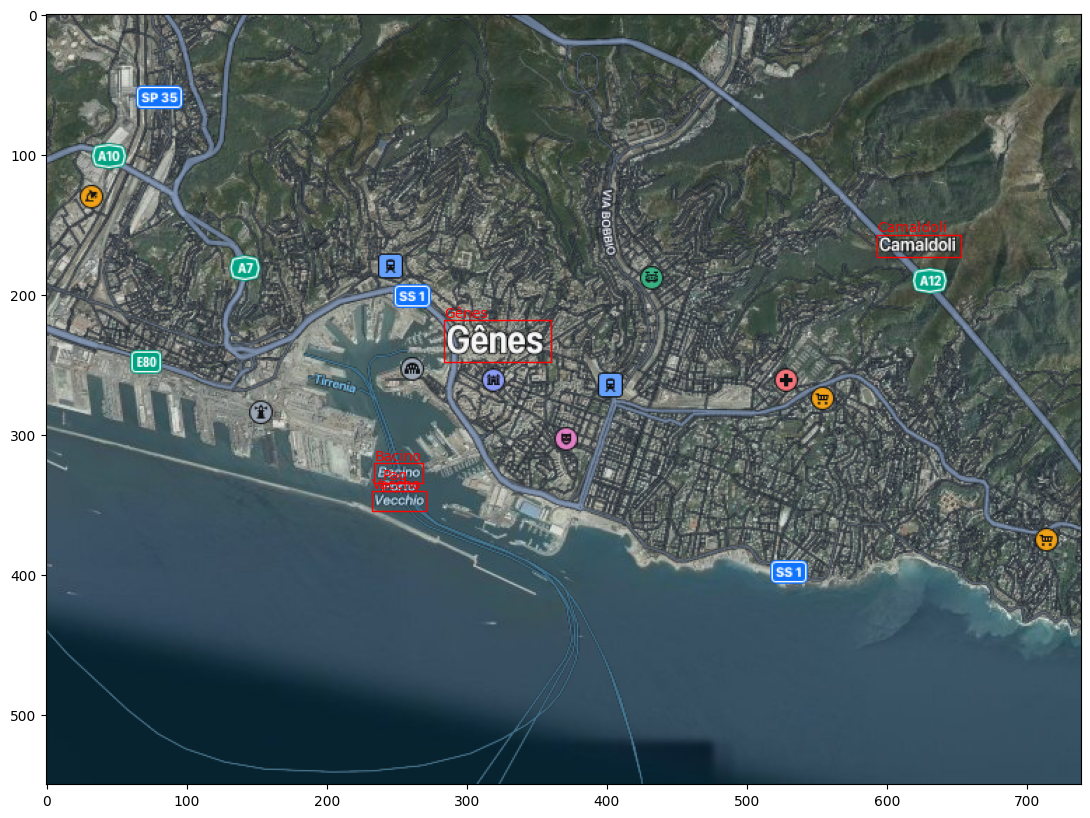

In [191]:
# Fonction pour extraire du texte de l'image avec EasyOCR
def extraire_texte_de_image(chemin_image):
    lecteur = easyocr.Reader(['en', 'fr', 'it', 'es', 'la'])

    resultat = lecteur.readtext(chemin_image, detail=1)

    resultats_formates = []
    for (bbox, texte, conf) in resultat:

        resultats_formates.append({
            "texte": texte,
            "boîte_englobante": {
                "gauche": bbox[0][0],
                "haut": bbox[0][1],
                "droite": bbox[2][0],
                "bas": bbox[2][1]
            },
            "confiance": conf
        })

    return resultats_formates

chemin_image = '/content/Genova.png'

# Extraire le texte de l'image
resultats_ocr = extraire_texte_de_image(chemin_image)
image = PILImage.open(chemin_image)
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(image)

# Ajouter les boîtes englobantes et le texte détecté
for resultat in resultats_ocr:
    gauche, haut, droite, bas = resultat["boîte_englobante"].values()
    largeur = droite - gauche
    hauteur = bas - haut

    rect = patches.Rectangle((gauche, haut), largeur, hauteur, linewidth=1, edgecolor='r', facecolor='none')

    ax.add_patch(rect)

    ax.text(gauche, haut - 2, resultat["texte"], color='r')

plt.show()

In [192]:
for resultat in resultats_ocr:
    for key, value in resultat['boîte_englobante'].items():
        resultat['boîte_englobante'][key] = int(value)

# Convertir en JSON
resultats_ocr_json = json.dumps(resultats_ocr, ensure_ascii=False, indent=4)
# Enregistrer dans un fichier JSON
with open('resultats_ocr.json', 'w') as json_file:
    json.dump(resultats_ocr, json_file, ensure_ascii=False, indent=4)

# Afficher le JSON
print(resultats_ocr_json)

[
    {
        "texte": "Camaldoli",
        "boîte_englobante": {
            "gauche": 593,
            "haut": 157,
            "droite": 653,
            "bas": 173
        },
        "confiance": 0.9999339569631562
    },
    {
        "texte": "Gênes",
        "boîte_englobante": {
            "gauche": 284,
            "haut": 218,
            "droite": 360,
            "bas": 248
        },
        "confiance": 0.9999586830876289
    },
    {
        "texte": "Bacino",
        "boîte_englobante": {
            "gauche": 234,
            "haut": 320,
            "droite": 269,
            "bas": 334
        },
        "confiance": 0.9309524431717044
    },
    {
        "texte": "Pag",
        "boîte_englobante": {
            "gauche": 240,
            "haut": 334,
            "droite": 264,
            "bas": 340
        },
        "confiance": 0.024326035268816288
    },
    {
        "texte": "Vaccho",
        "boîte_englobante": {
            "gauche": 232,
            "ha

# OCR avec Keras-OCR

In [193]:
image = '/content/Genova.png'

In [194]:
import keras_ocr
languages = ['en', 'fr', 'it', 'es', 'de']

pipeline = keras_ocr.pipeline.Pipeline()
pipeline.langs = languages

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [195]:
results = pipeline.recognize([image])

1/1 [==============================] - 6s 6s/step


In [196]:
pd.DataFrame(results[0], columns=['text', 'bbox'])

,text,bbox
0,sp,"[[67.0, 55.0], [81.0, 55.0], [81.0, 65.0], [67..."
1,35,"[[81.0, 55.0], [95.0, 55.0], [95.0, 65.0], [81..."
2,a10,"[[36.0, 96.0], [55.0, 96.0], [55.0, 107.0], [3..."
3,,"[[395.74414, 125.256386], [405.89075, 124.7614..."
4,camaldoli,"[[594.99994, 158.99998], [650.99994, 158.99998..."
5,a12,"[[624.0, 185.0], [644.0, 185.0], [644.0, 197.0..."
6,ss,"[[251.0, 197.0], [265.0, 197.0], [265.0, 207.0..."
7,genes,"[[287.0, 222.0], [357.0, 222.0], [357.0, 244.0..."
8,e80,"[[64.0, 244.0], [80.0, 244.0], [80.0, 253.0], ..."
9,tironia,"[[191.54724, 255.7017], [223.81332, 263.38412]..."


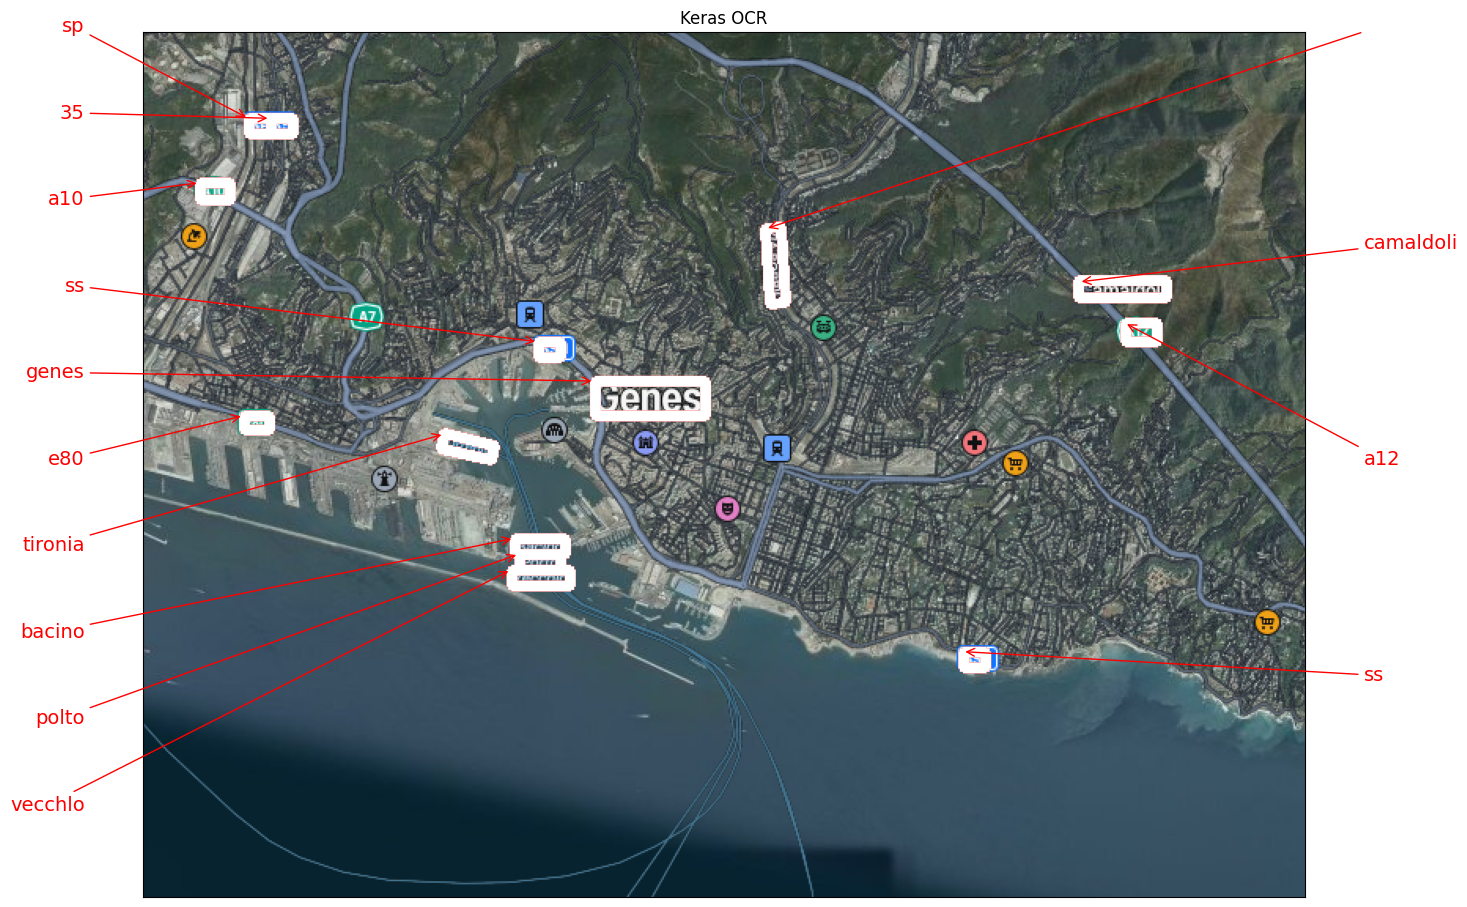

In [197]:
fig, ax = plt.subplots(figsize=(15, 12))
keras_ocr.tools.drawAnnotations(plt.imread(image), results[0], ax=ax)
ax.set_title('Keras OCR')
plt.show()

##Extraction de tableaux avec EasyOCR et img2table





In [198]:
# EasyOCR et img2table
from img2table.ocr import EasyOCR
from img2table.document import Image

easyocr = EasyOCR(lang=["fr"], kw={"gpu": False})

In [199]:
img = Image(src="/content/Extrait_IQOA_data.png")
extracted_tables = img.extract_tables()

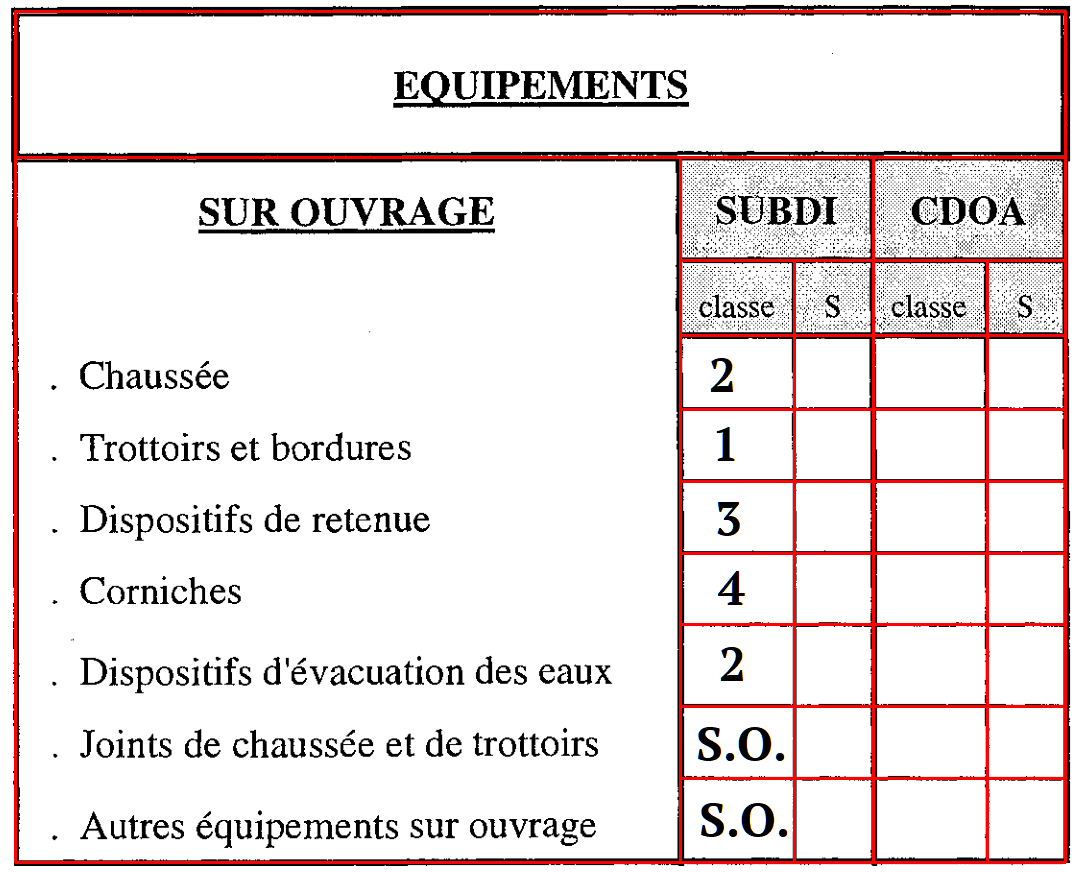

In [200]:
table_img = cv2.imread("/content/Extrait_IQOA_data.png")

for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            cv2.rectangle(table_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 2)

PILImage.fromarray(table_img)

In [201]:
# Exporter vers un fichier Excel
img.to_xlsx('tableau.xlsx',
            ocr=easyocr,
            implicit_rows=True,
            borderless_tables=False,
            min_confidence=5)